In [1]:
# PyTorch Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


In [10]:
# Step 1 & 2: Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])  # Defining preprocessing transformations

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)  # Loading training dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)  # Creating data loader for training set


testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)  # Loading test dataset
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

classes = tuple(str(i) for i in range(10))


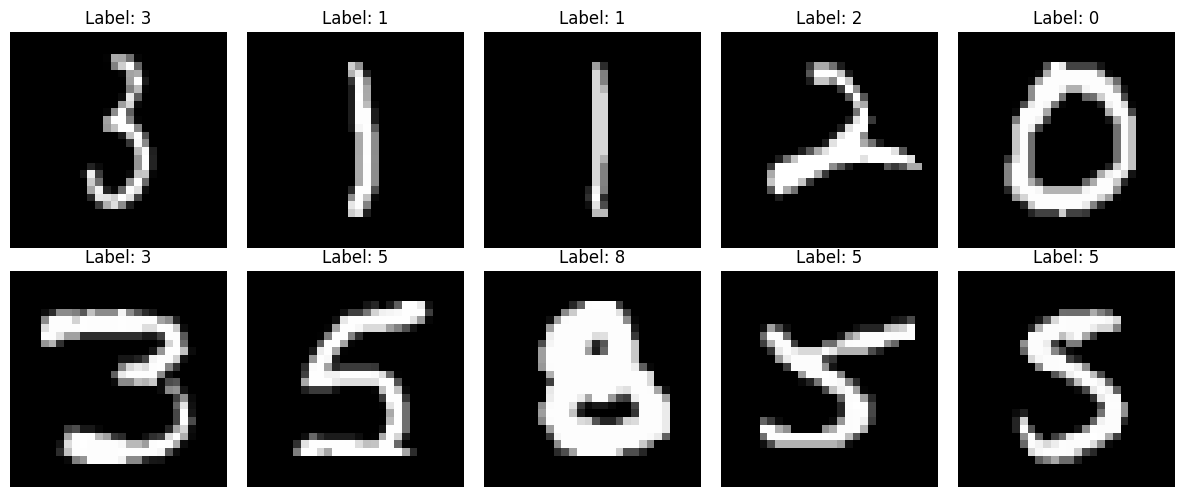

In [11]:
# Step 3: Show 10 images with their labels in subplots
images, labels = next(iter(trainloader))

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flatten()):  # Iterating over subplots to display images
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')  # Displaying the image in grayscale
    ax.set_title(f'Label: {labels[i].item()}')  # Setting title as the label of the image
    ax.axis('off')  # Hiding axis
plt.tight_layout()

plt.show()


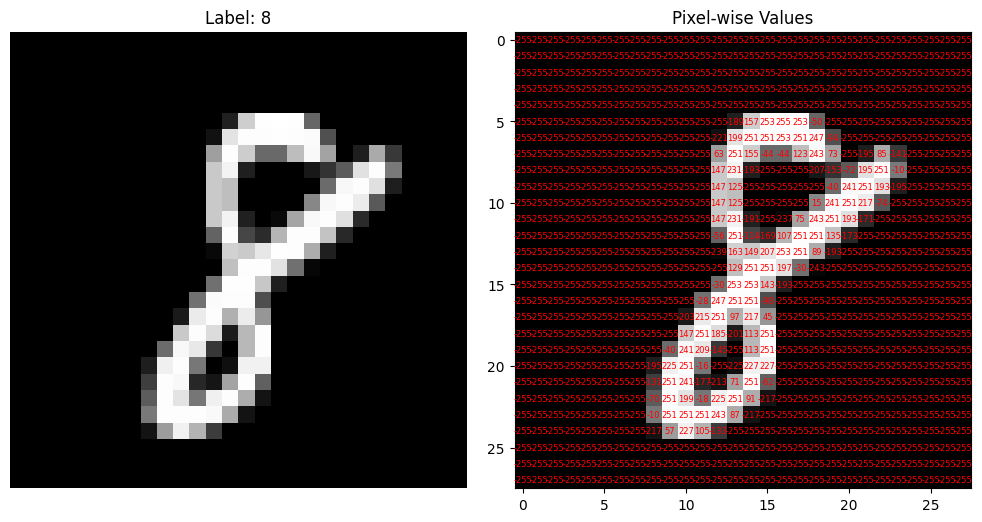

In [4]:
# Step 4: Show a single image and its corresponding pixel-wise values
image, label = images[0], labels[0]  # Selecting the first image and label from the batch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Creating a figure with 1 row and 2 columns of subplots
ax1.imshow(image.numpy().squeeze(), cmap='gray')  # Displaying the image in grayscale
ax1.set_title(f'Label: {label.item()}')  # Setting title as the label of the image
ax1.axis('off')  # Hiding axis

ax2.imshow(image.numpy().squeeze(), cmap='gray')  # Displaying the same image in grayscale
for (j, k), value in np.ndenumerate(image.numpy().squeeze()):  # Iterating over each pixel to display its value
    ax2.text(k, j, int(value * 255), ha='center', va='center', fontsize=6, color='red')  # Adding text to each pixel
ax2.set_title('Pixel-wise Values')  # Setting title for the subplot
plt.tight_layout()  # Adjusting subplot spacing
plt.show()  # Displaying the plot


In [28]:
class CNN(nn.Module):  # Defining a Convolutional Neural Network class
    def __init__(self):
        super(CNN, self).__init__()  # Calling the parent class constructor
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding='same')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same')
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding='same')
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):  # Defining forward pass
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [29]:
# Model, loss, optimizer setup
model = CNN()  # Creating an instance of the CNN model
criterion = nn.CrossEntropyLoss()  # Defining the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Defining the optimizer


In [30]:
def train_model(model, trainloader, criterion, optimizer, num_epochs=5):  # Function to train the model
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
    print('Finished Training')

train_model(model, trainloader, criterion, optimizer, num_epochs=5)


[1, 100] loss: 0.963
[1, 200] loss: 0.270
[1, 300] loss: 0.186
[1, 400] loss: 0.151
[1, 500] loss: 0.149
[1, 600] loss: 0.113
[1, 700] loss: 0.099
[1, 800] loss: 0.095
[1, 900] loss: 0.093
[1, 1000] loss: 0.084
[1, 1100] loss: 0.084
[1, 1200] loss: 0.080
[1, 1300] loss: 0.078
[1, 1400] loss: 0.068
[1, 1500] loss: 0.086
[1, 1600] loss: 0.081
[1, 1700] loss: 0.071
[1, 1800] loss: 0.058
[2, 100] loss: 0.056
[2, 200] loss: 0.061
[2, 300] loss: 0.039
[2, 400] loss: 0.043
[2, 500] loss: 0.054
[2, 600] loss: 0.064
[2, 700] loss: 0.053
[2, 800] loss: 0.062
[2, 900] loss: 0.063
[2, 1000] loss: 0.050
[2, 1100] loss: 0.052
[2, 1200] loss: 0.053
[2, 1300] loss: 0.051
[2, 1400] loss: 0.066
[2, 1500] loss: 0.048
[2, 1600] loss: 0.043
[2, 1700] loss: 0.030
[2, 1800] loss: 0.067
[3, 100] loss: 0.028
[3, 200] loss: 0.037
[3, 300] loss: 0.043
[3, 400] loss: 0.033
[3, 500] loss: 0.041
[3, 600] loss: 0.049
[3, 700] loss: 0.038
[3, 800] loss: 0.034
[3, 900] loss: 0.028
[3, 1000] loss: 0.047
[3, 1100] loss:

In [31]:
# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 99.12%


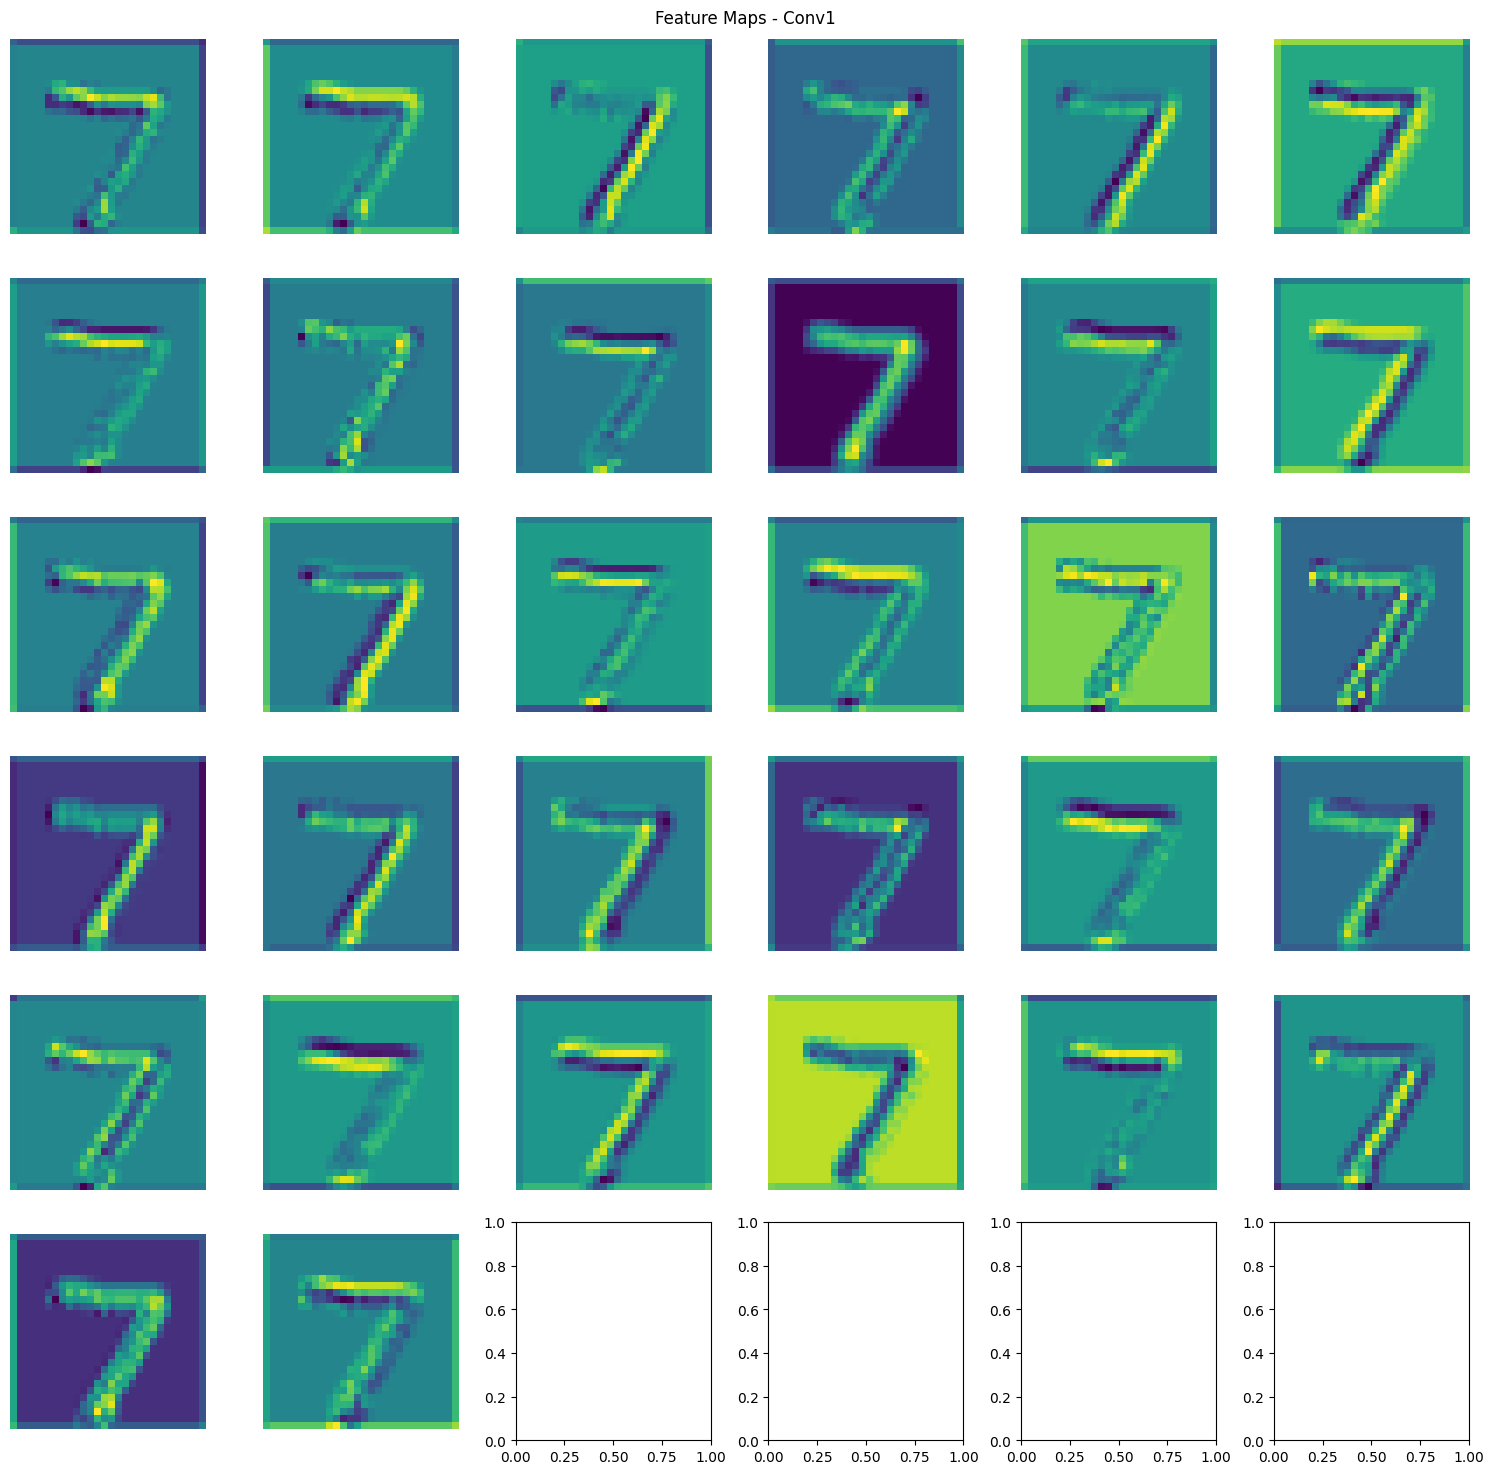

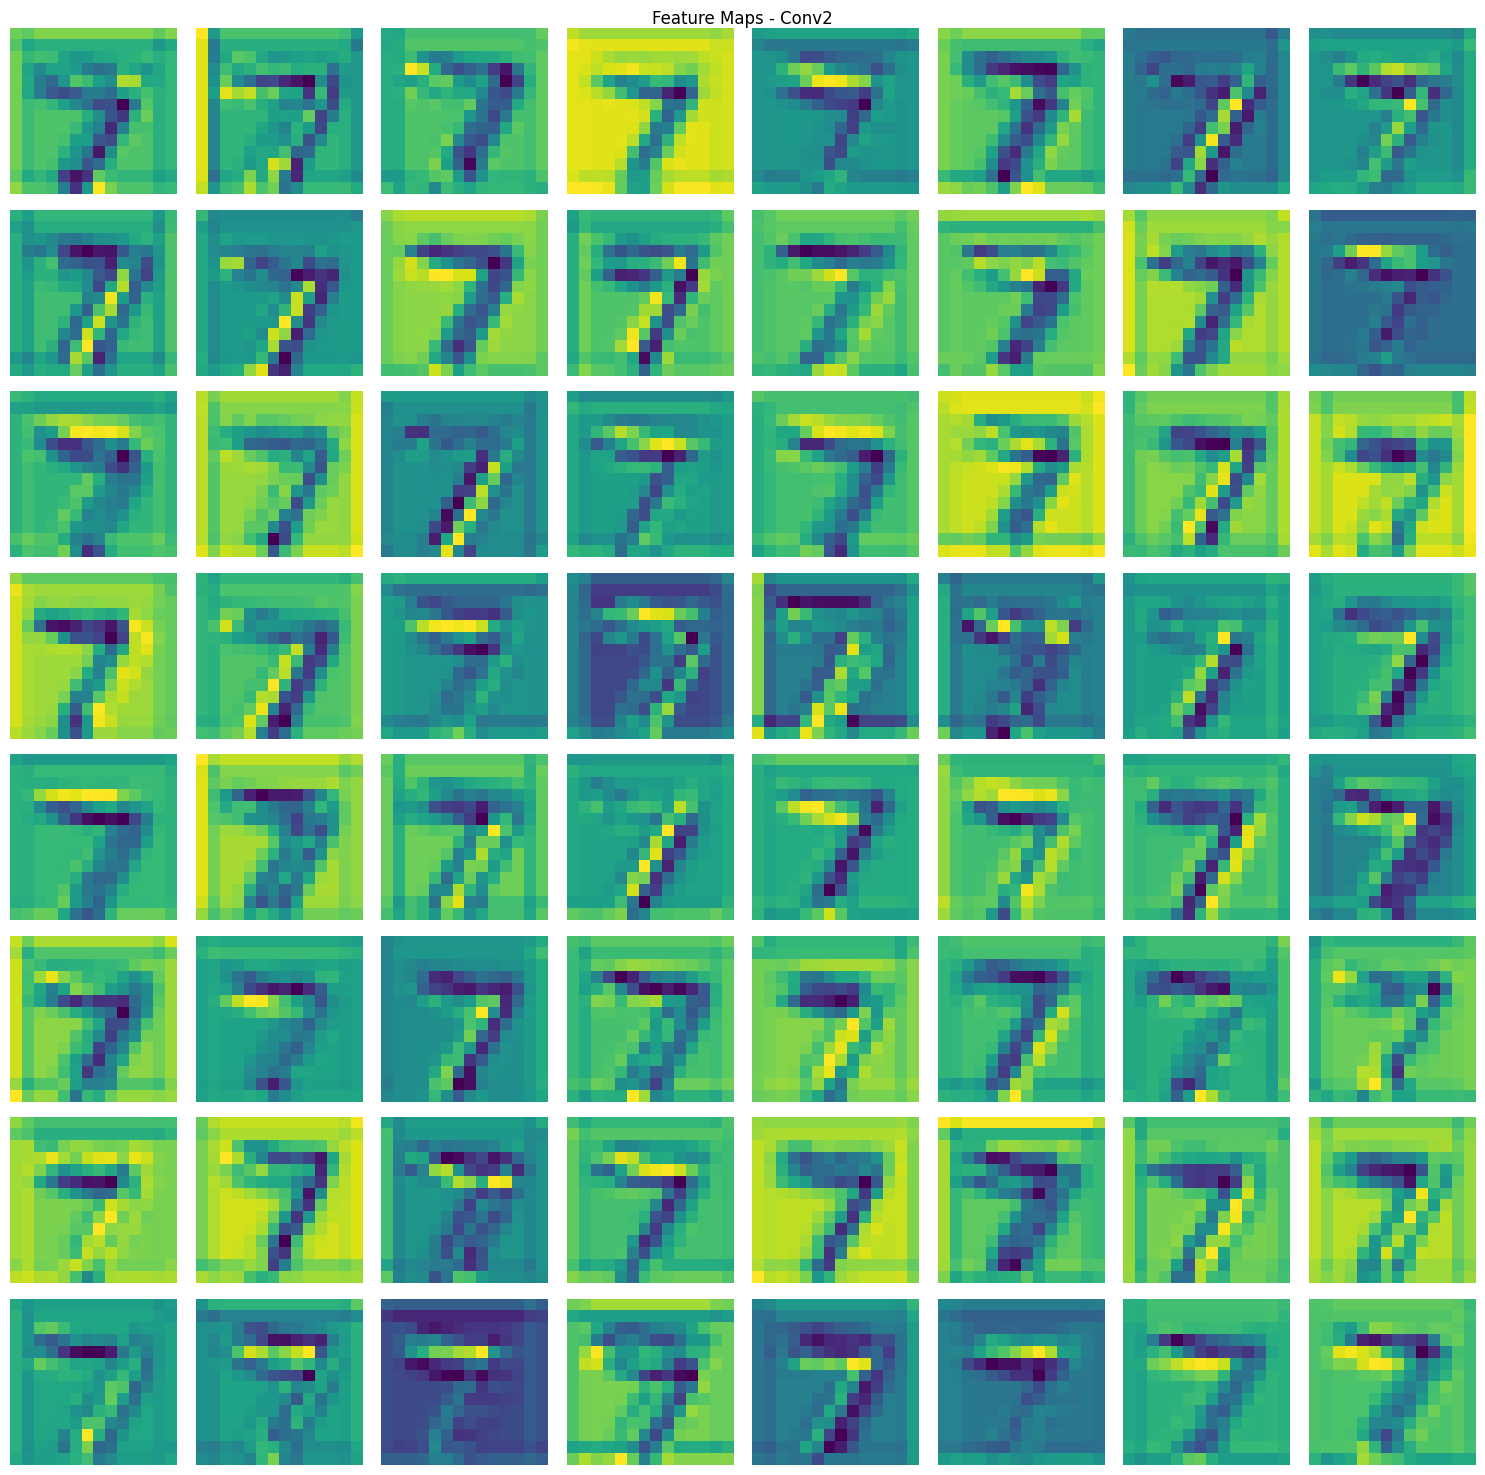

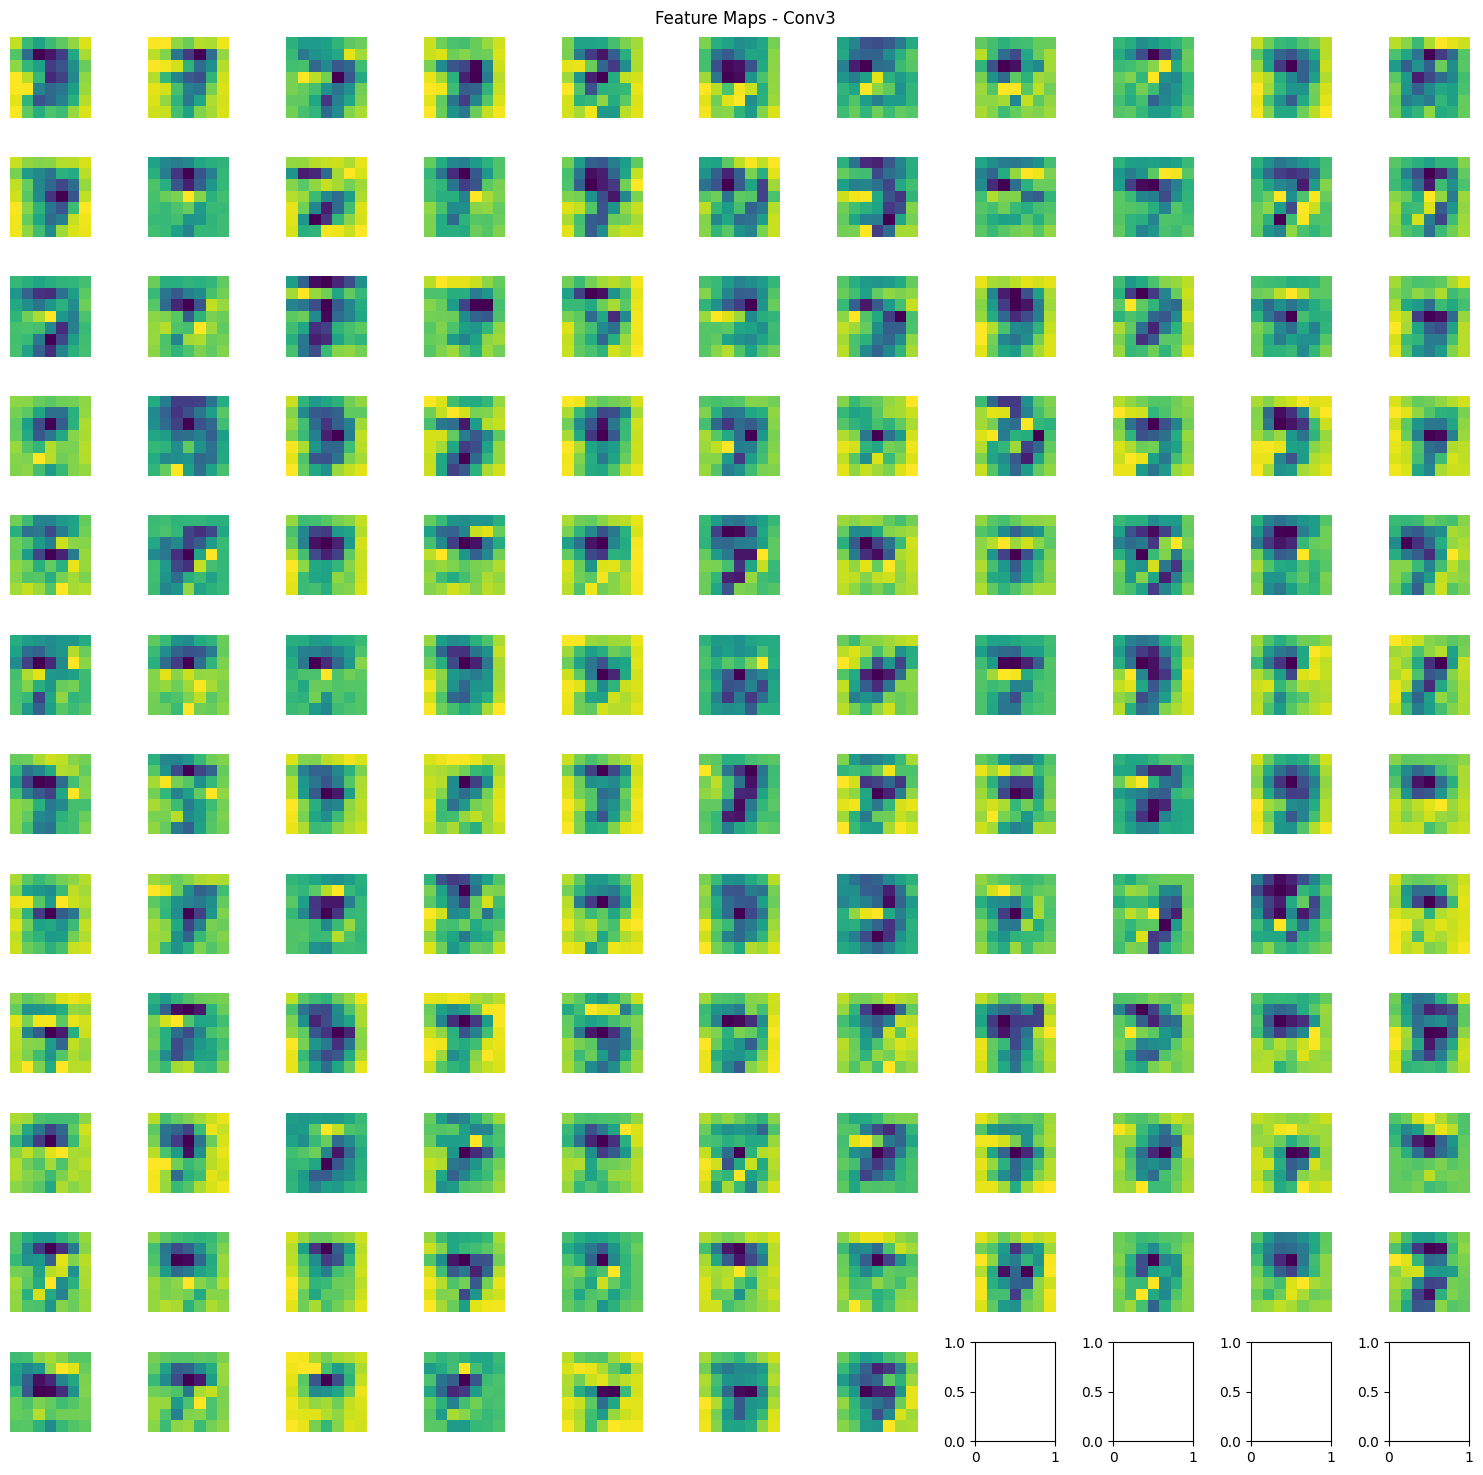

In [32]:
# Step 6: Visualizing feature maps
def visualize_feature_maps(model, image):
    # Function to visualize feature maps
    def plot_feature_maps(feature_maps, layer_name):
        num_features = feature_maps.shape[1]
        rows = int(np.ceil(np.sqrt(num_features)))
        cols = int(np.ceil(num_features / rows))
        fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
        fig.suptitle(f'Feature Maps - {layer_name}')
        for i in range(num_features):
            ax = axes[i // cols, i % cols]
            ax.imshow(feature_maps[0, i].detach().numpy(), cmap='viridis')
            ax.axis('off')
        plt.tight_layout()
        plt.show()

    # Forward pass through each layer
    x = image.unsqueeze(0)

    x = model.conv1(x)
    plot_feature_maps(x, 'Conv1')
    x = F.relu(x)
    x = model.pool(x)

    x = model.conv2(x)
    plot_feature_maps(x, 'Conv2')
    x = F.relu(x)
    x = model.pool(x)

    x = model.conv3(x)
    plot_feature_maps(x, 'Conv3')

# Get a sample image
sample_image, _ = next(iter(testloader))
sample_image = sample_image[0]

# Visualize feature maps
visualize_feature_maps(model, sample_image)

## Keras

In [33]:
# Step 6: CNN + Classification in Keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [34]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


# Step 2: Preprocessing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


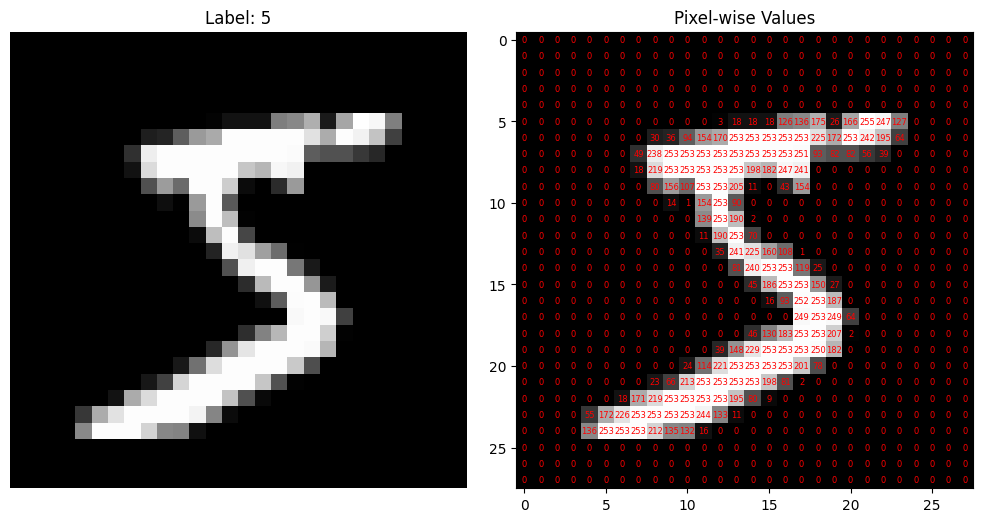

In [35]:
# Step 4: Single image with pixel-wise values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(train_images[0].squeeze(), cmap='gray')
ax1.set_title(f'Label: {train_labels[0]}')
ax1.axis('off')

ax2.imshow(train_images[0].squeeze(), cmap='gray')
for (j, k), value in np.ndenumerate(train_images[0].squeeze()):
    ax2.text(k, j, int(value * 255), ha='center', va='center', fontsize=6, color='red')
ax2.set_title('Pixel-wise Values')
plt.tight_layout()
plt.show()


In [36]:
# Step 5: CNN + Classification in Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluation
val_loss, val_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8751 - loss: 0.3769 - val_accuracy: 0.9862 - val_loss: 0.0434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0590 - val_accuracy: 0.9891 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9883 - loss: 0.0417 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 0.9923 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0257 - val_accuracy: 0.9936 - val_loss: 0.0263
313/313 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0263
Validation accuracy: 99.36%


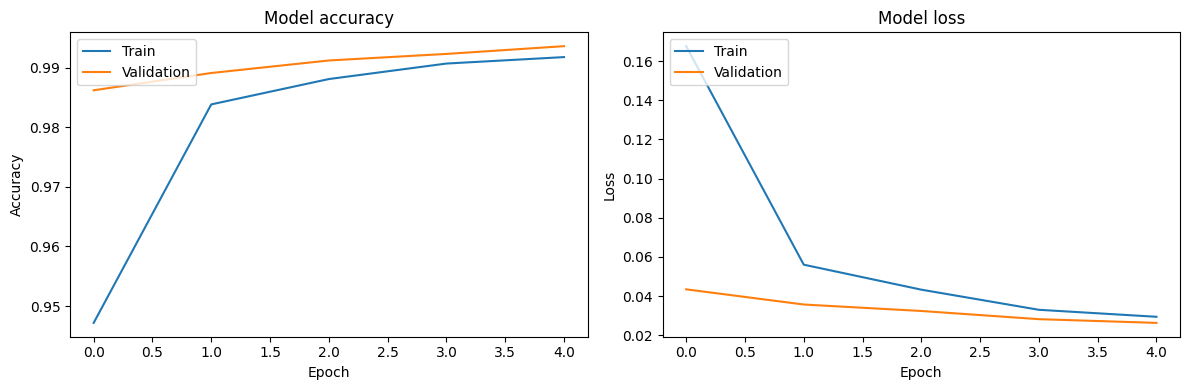

In [38]:
# Plotting learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
